In [19]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import re
import numpy as np
import seaborn as sns
## for the stats class
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
import timeit
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd
from datetime import datetime
import pytz
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from skimage import io
from patchify import patchify, unpatchify
%matplotlib inline

import collections
# from itertools import chain
# import urllib.request as request
# import pickle

import numpy as np

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

# import cv2
from sklearn import preprocessing

# from libsvm import svmutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [20]:
def plot_confusion_matrix(y_test, y_test_pred, model_name):
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    group_names = ['True Negative (TN)', 'False Positive (FP)',
                'False Negative (FN)', 'True Positive (TP)']
    group_counts = ["{0:0.0f}".format(value) for value in test_confusion_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in test_confusion_matrix.flatten()/np.sum(test_confusion_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Creating the heatmap
    plt.figure(figsize=(8,5))
    sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Blues', vmin = 0)
    plt.title("Confusion Matrix for "+ model_name+ " (using Test Set)")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [21]:
def balance_dataset(X, y):
    # Separate the data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    # Sample an equal number of samples from each class
    num_samples_per_class = min(len(class_0_indices), len(class_1_indices))

    # Randomly sample indices for each class
    sampled_indices_class_0 = np.random.choice(class_0_indices, num_samples_per_class, replace=False)
    sampled_indices_class_1 = np.random.choice(class_1_indices, num_samples_per_class, replace=False)

    # Combine the sampled indices
    sampled_indices = np.concatenate([sampled_indices_class_0, sampled_indices_class_1])

    # Use the sampled indices to create the balanced training set
    X_balanced = X[sampled_indices]
    y_balanced = y[sampled_indices]

    # Check the balance in y_train_balanced
    print(np.bincount(y_balanced))

    return(X_balanced, y_balanced)

In [22]:
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
# fog_aware_pivot = pd.read_csv('fog_aware_stats_no_patches_pivot.csv')
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
fog_aware_pivot = pd.read_csv('fog_aware_stats_horizontal_3_patches_pivot.csv')
fog_aware_pivot['Label_train'] = 1*(fog_aware_pivot['Label']=='foggy')
fog_aware_pivot

,photo,Label,site,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,...,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_train
0,2022_07-04.0000_agatebeachor.jpg,not_foggy,agatebeachor,0,0.220805,0.285012,0.099900,0.065638,0.106588,0.034401,...,28.0,6.0,14.0,0.000000,0.000000,0.000000,85.593872,51.769043,10.103722,0
1,2022_07-04.0000_otterrockor.jpg,not_foggy,otterrockor,0,0.725298,0.720047,0.691137,0.493167,0.477681,0.461369,...,2.0,4.0,0.0,0.244513,0.152914,0.160079,90.752732,158.670973,166.963307,0
2,2022_07-04.0700_agatebeachor.jpg,not_foggy,agatebeachor,7,0.096299,0.131353,0.173731,0.015461,0.041110,0.050096,...,64.0,24.0,37.0,0.000000,0.000000,0.000000,35.000917,18.467704,9.174465,0
3,2022_07-04.0730_agatebeachor.jpg,not_foggy,agatebeachor,7,0.101561,0.205493,0.325304,0.016175,0.091502,0.142794,...,95.0,13.0,20.0,0.063917,0.072188,0.164992,105.608782,106.996344,147.341268,0
4,2022_07-04.0730_otterrockor.jpg,not_foggy,otterrockor,7,0.251876,0.576411,0.588961,0.082378,0.292454,0.396829,...,7.0,0.0,0.0,0.099916,0.042100,0.124894,110.066753,189.517876,183.865692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,agatebeachor,19,0.176457,0.743293,0.523022,0.083535,0.457137,0.265502,...,70.0,0.0,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656,0
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,cannonbeach,19,0.164592,0.585149,0.640644,0.042335,0.314184,0.390172,...,0.0,0.0,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957,0
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,otterrockor,20,0.282921,0.442290,0.345411,0.136875,0.235093,0.183542,...,22.0,3.0,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589,0
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,otterrockor,20,0.193967,0.582705,0.378667,0.059283,0.307785,0.207709,...,26.0,0.0,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567,0


In [23]:
fog_aware_pivot[['Label_train', 'Label']].value_counts()

Label_train  Label    
0            not_foggy    6374
1            foggy        1622
dtype: int64

In [24]:
fog_aware_pivot
np.array(fog_aware_pivot.columns[fog_aware_pivot.columns.str.contains(r'_1|Label$')])

array(['Label', 'mscn_var_1', 'vertical_var_1', 'sharpness_1',
       'coef_or_var_sharpness_1', 'rms_contrast_1', 'entropy_1',
       'dark_channel_prior_1', 'color_sat_1', 'CF_1'], dtype=object)

In [26]:
site = 'agatebeachor'

####create summary stat datasets
gmm_summary_stats = pd.DataFrame(columns = ['site',
"Accuracy",
"Precision",
"Recall",
"F1 Score",
"AUC"
])

precision_recall = pd.DataFrame(columns = ['site','precision_array', 'recall_array' ])
roc = pd.DataFrame(columns = ['site','fpr', 'tpr'])
y_info = pd.DataFrame(columns = ['site','y_test','y_test_pred', 'y_scores'])

###define columns to keep in analysis
to_keep_3_patches = ['mscn_var_1',
'vertical_var_1',
'sharpness_1',
'coef_or_var_sharpness_1',
'rms_contrast_1']

site = 'all_sites'
X = np.array(fog_aware_pivot[to_keep_3_patches])

y = fog_aware_pivot['Label_train']

####create a 50/50 dataset of foggy not foggy
X_balanced, y_balanced = balance_dataset(X, y)


###scale the data to 0, 1
scaler = preprocessing.StandardScaler().fit(X_balanced)
X_scaled = scaler.transform(X_balanced)

####train test split
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_balanced, test_size=0.25, random_state=42, stratify = y_balanced)

n_classes = len(np.unique(y_train))

gmm = GaussianMixture(n_components=n_classes
                    ,covariance_type='diag' ##this covariance type works best
                     )
gmm.fit(X_train)
y_train_pred = gmm.predict(X_train)
y_test_pred = gmm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

y_scores = gmm.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds = roc_curve(y_test, gmm.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

####gmm summary stats
gmm_summary_stats = pd.concat([gmm_summary_stats,
                               pd.DataFrame({'site':[site],
                "Accuracy":[accuracy],
                "Precision":[precision],
                "Recall":[recall],
                "F1 Score":[f1],
                "AUC":[roc_auc]
                                            })
            ], axis = 0)

#### precision recall
precision_recall = pd.concat([precision_recall
,pd.DataFrame({'site':site,'precision_array':precision_array, 'recall_array':recall_array })
],axis=0)
###roc chart
roc = pd.concat([roc
,pd.DataFrame({'site':site,'fpr':fpr, 'tpr':tpr})
],axis=0)
##prediction info
y_info = pd.concat([y_info
,pd.DataFrame({'site':site,'y_test':y_test,'y_test_pred':y_test_pred, 'y_scores':y_scores})
],axis=0)

[1622 1622]
Accuracy: 0.8323057953144266
Precision: 0.8684931506849315
Recall: 0.782716049382716
F1 Score: 0.8233766233766233


In [27]:
compare = pd.DataFrame({'actual':y_test, 'pred':y_test_pred})
pd.crosstab(compare['pred'], compare['actual'])

actual,0,1
pred,,
0,358,88
1,48,317


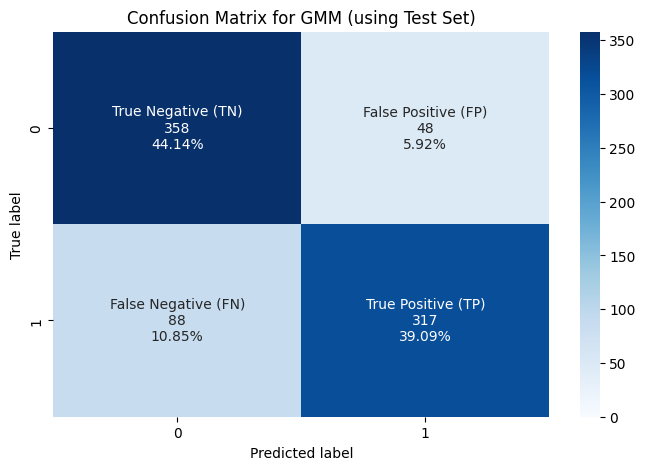

In [28]:
plot_confusion_matrix(y_test, y_test_pred, "GMM")

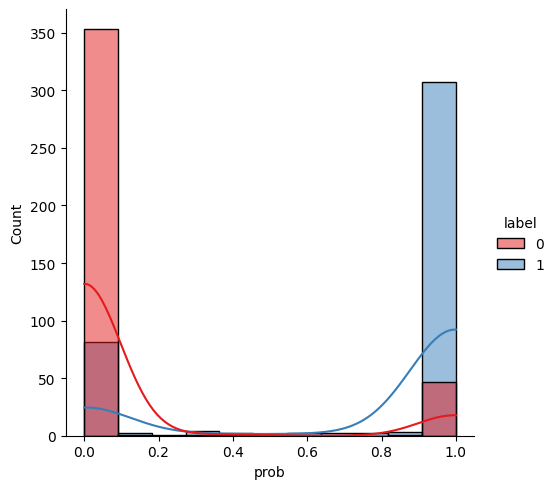

In [29]:
df = pd.DataFrame({'prob':y_scores,'label':y_test })
sns.displot(data=df, x='prob', hue='label', kde=True, palette='Set1')

In [30]:
####loop through sites
for site in fog_aware_pivot.site.unique():

    print(site)
    fog_aware_site = fog_aware_pivot.loc[fog_aware_pivot['site'] == site].reset_index()

    X = np.array(fog_aware_site[to_keep_3_patches]
                )
    # X = np.array(fog_aware_site.drop(['photo', 'Label', 'site', 'hour', 'Label_train'], axis = 1)
    #             )

    y = fog_aware_site['Label_train']

    ####create a 50/50 dataset of foggy not foggy
    X_balanced, y_balanced = balance_dataset(X, y)


    ###scale the data to 0, 1
    scaler = preprocessing.StandardScaler().fit(X_balanced)
    X_scaled = scaler.transform(X_balanced)

    ####train test split
    X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_balanced, test_size=0.25, random_state=42, stratify = y_balanced)

    n_classes = len(np.unique(y_train))

    gmm = GaussianMixture(n_components=n_classes
                        ,covariance_type='diag' ##this covariance type works best
                         )
    gmm.fit(X_train)
    y_train_pred = gmm.predict(X_train)
    y_test_pred = gmm.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)

    while accuracy < 0.45:  ###in case the model gets the 1s and 0s mixed up
        gmm = GaussianMixture(n_components=n_classes
                            ,covariance_type='diag' ##this covariance type works best
                             )
        gmm.fit(X_train)
        y_train_pred = gmm.predict(X_train)
        y_test_pred = gmm.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        print(accuracy)

#         if accuracy < 0.4: ###in case the model gets the 1s and 0s mixed up AGAIN
#             gmm = GaussianMixture(n_components=n_classes
#                                 ,covariance_type='diag' ##this covariance type works best
#                                  )
#             gmm.fit(X_train)
#             y_train_pred = gmm.predict(X_train)
#             y_test_pred = gmm.predict(X_test)

#             # Calculate metrics
#             accuracy = accuracy_score(y_test, y_test_pred)

#             if accuracy < 0.4: ###in case the model gets the 1s and 0s mixed up AGAIN
#                 gmm = GaussianMixture(n_components=n_classes
#                                     ,covariance_type='diag' ##this covariance type works best
#                                      )
#                 gmm.fit(X_train)
#                 y_train_pred = gmm.predict(X_train)
#                 y_test_pred = gmm.predict(X_test)

#                 # Calculate metrics
#                 accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    # print("AUC-ROC Score:", roc_auc)
    print(confusion_matrix(y_test, y_test_pred))
    tt = confusion_matrix(y_test, y_test_pred)

    y_scores = gmm.predict_proba(X_test)[:, 1]

    # Calculate precision and recall for various thresholds
    precision_array, recall_array, thresholds = precision_recall_curve(y_test, y_scores)

    fpr, tpr, thresholds = roc_curve(y_test, gmm.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    ####gmm summary stats
    gmm_summary_stats = pd.concat([gmm_summary_stats,
                                   pd.DataFrame({'site':[site],
                    "Accuracy":[accuracy],
                    "Precision":[precision],
                    "Recall":[recall],
                    "F1 Score":[f1],
                    "AUC":[roc_auc]
                                                })
                ], axis = 0)

    #### precision recall
    precision_recall = pd.concat([precision_recall
    ,pd.DataFrame({'site':site,'precision_array':precision_array, 'recall_array':recall_array })
    ],axis=0)
    ###roc chart
    roc = pd.concat([roc
    ,pd.DataFrame({'site':site,'fpr':fpr, 'tpr':tpr})
    ],axis=0)
    ##prediction info
    y_info = pd.concat([y_info
    ,pd.DataFrame({'site':site,'y_test':y_test,'y_test_pred':y_test_pred, 'y_scores':y_scores})
    ],axis=0)

agatebeachor
[335 335]
0.8273809523809523
Accuracy: 0.8273809523809523
Precision: 0.7956989247311828
Recall: 0.8809523809523809
F1 Score: 0.8361581920903954
[[65 19]
 [10 74]]
otterrockor
[217 217]
0.8348623853211009
Accuracy: 0.8348623853211009
Precision: 0.86
Recall: 0.7962962962962963
F1 Score: 0.826923076923077
[[48  7]
 [11 43]]
beverlyor
[137 137]
Accuracy: 0.927536231884058
Precision: 0.9393939393939394
Recall: 0.9117647058823529
F1 Score: 0.9253731343283583
[[33  2]
 [ 3 31]]
pacificcityor
[209 209]
Accuracy: 0.819047619047619
Precision: 1.0
Recall: 0.6346153846153846
F1 Score: 0.7764705882352941
[[53  0]
 [19 33]]
lincolncityor
[494 494]
Accuracy: 0.7813765182186235
Precision: 0.7716535433070866
Recall: 0.7967479674796748
F1 Score: 0.7839999999999999
[[95 29]
 [25 98]]
cannonbeach
[230 230]
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.6956521739130435
Accuracy: 0.6956521739130435
Precision: 0.6666666666666666
Recall: 0.7719298245614035
F1 Score: 0.715447154471

In [31]:
# gmm_summary_stats.to_csv('gmm_outputs_sites/gmm_summary_stats.csv'
# ,index = False)

# precision_recall.to_csv('gmm_outputs_sites/precision_recall.csv'
# ,index = False)
# roc.to_csv('gmm_outputs_sites/roc.csv'
# ,index = False)
# y_info.to_csv('gmm_outputs_sites/y_info.csv'
# ,index = False)

In [32]:
precision_recall

,site,precision_array,recall_array
0,all_sites,0.499383,1.000000
1,all_sites,0.501238,1.000000
2,all_sites,0.501859,1.000000
3,all_sites,0.502481,1.000000
4,all_sites,0.503106,1.000000
...,...,...,...
105,cannonbeach,1.000000,0.070175
106,cannonbeach,1.000000,0.052632
107,cannonbeach,1.000000,0.035088
108,cannonbeach,1.000000,0.017544


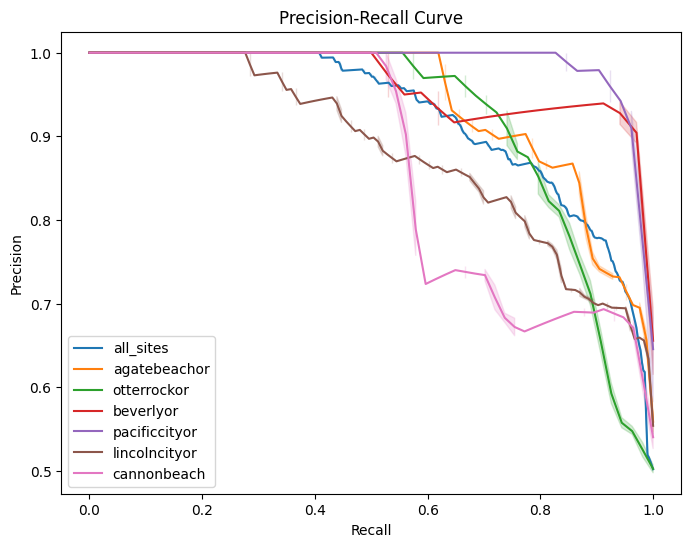

In [33]:
precision_recall = precision_recall.reset_index()
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label='Precision-Recall curve')
sns.lineplot(x='recall_array', y='precision_array', hue='site', data =precision_recall )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [34]:
roc

,site,fpr,tpr
0,all_sites,0.000000,0.000000
1,all_sites,0.000000,0.002469
2,all_sites,0.000000,0.409877
3,all_sites,0.002463,0.409877
4,all_sites,0.002463,0.434568
...,...,...,...
26,cannonbeach,0.500000,0.982456
27,cannonbeach,0.758621,0.982456
28,cannonbeach,0.758621,1.000000
29,cannonbeach,0.879310,1.000000


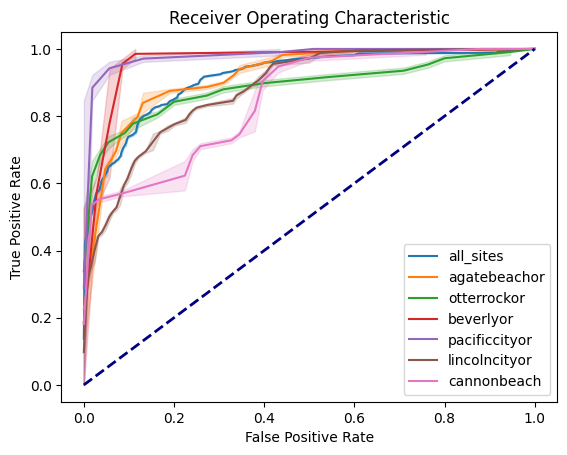

In [35]:
roc = roc.reset_index()
plt.figure()
sns.lineplot(x='fpr', y='tpr', hue='site', data =roc )
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

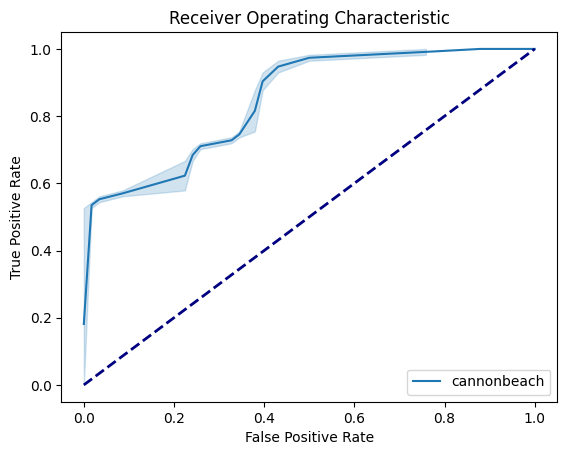

In [36]:
roc = roc.reset_index()
plt.figure()
sns.lineplot(x='fpr', y='tpr', hue='site', data =roc.loc[roc['site']=='cannonbeach'] )
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
roc.loc[roc['site']=='beverlyor']

,level_0,index,site,fpr,tpr
270,270,0,beverlyor,0.000000,0.000000
271,271,1,beverlyor,0.000000,0.029412
272,272,2,beverlyor,0.000000,0.529412
273,273,3,beverlyor,0.028571,0.529412
274,274,4,beverlyor,0.028571,0.617647
275,275,5,beverlyor,0.057143,0.617647
276,276,6,beverlyor,0.057143,0.941176
277,277,7,beverlyor,0.085714,0.941176
278,278,8,beverlyor,0.085714,0.970588
279,279,9,beverlyor,0.114286,0.970588
